# Lab 2

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("sources/dog.jpg")
print(f"Image shape: {img.shape}")
print(f"Image type: {type(img)}")

Image shape: (1367, 2048, 3)
Image type: <class 'numpy.ndarray'>


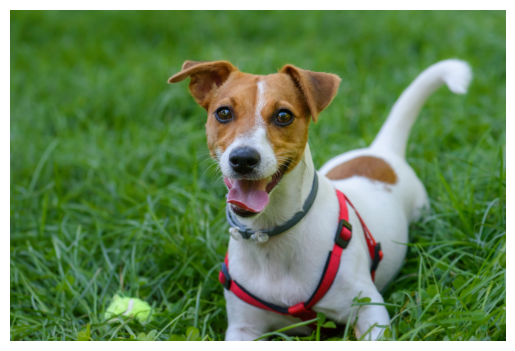

In [4]:
# Use matplotlib to plot the img
# we need to convert to RGB from BGR
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

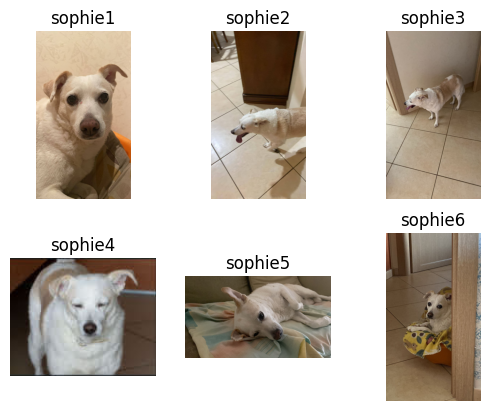

In [5]:
for i in range(1,7):
    plt.subplot(2,3,i)
    name= f"sophie{i}"
    img = cv2.imread(f"sources/sophie ({i}).jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(name)
    plt.axis('off')
plt.show()

In [6]:
def read_img(img_in):
    img = cv2.imread(img_in)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
    

def show_img(img):
    if len(img.shape) < 3:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()

Cropping an image

149 529


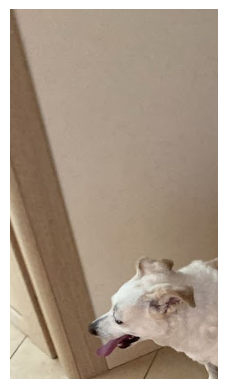

In [7]:
img = read_img("sources/sophie (3).jpg")
rows,cols = img.shape[0:2]


rows, cols = img.shape[0:2]
startRow = int(rows*.30)
startCol = int(cols*.30)
endRow = int(rows*.60)
endCol = int(cols*.60)

print(startCol,endRow)

cropped_img = img[0:rows//2, 0:cols//2 ]
show_img(cropped_img)

Image rotation

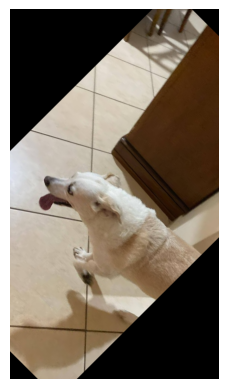

In [8]:
img = read_img("sources/sophie (2).jpg")
height, width = img.shape[0:2]

# angle
rotation = -45

rot_matrix_img = cv2.getRotationMatrix2D((width/2, height/2), rotation, 1)

rot_img = cv2.warpAffine(img, rot_matrix_img, (width, height))

show_img(rot_img)

Image resize

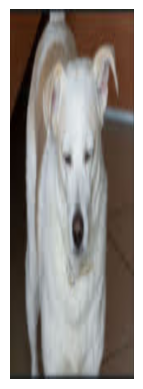

In [9]:
w1 = 300
h1 = 900

img = read_img("sources/sophie (4).jpg")

img_res = cv2.resize(img, (w1,h1))

show_img(img_res)

Gray scale

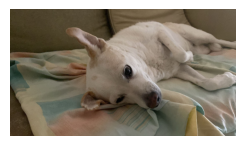

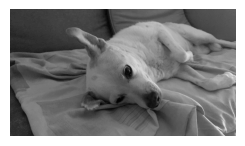

In [10]:
img = read_img("sources/sophie (5).jpg")

b,g,r = cv2.split(img)


gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

l = [0, img, gray_img]
for i in range(1,3):
        plt.subplot(1,2,i)
        show_img(l[i])
plt.show()

text and squares

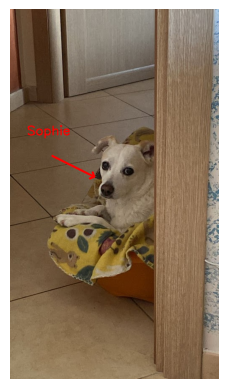

In [11]:
# Read the image from the specified filepath
img = read_img("sources/sophie (6).jpg")

# Create a copy of the image to draw a rectangle
rect = img.copy()

# Draw a rectangle on the image
# Arguments:
# - (200, 70): Top-left corner coordinates of the rectangle
# - (400, 150): Bottom-right corner coordinates of the rectangle
# - (255, 0, 0): Color of the rectangle (in BGR format)
# - 3: Thickness of the rectangle
cv2.rectangle(rect, (200, 70), (400, 150), (255, 0, 0), 3)

# Create a copy of the image to draw an arrow and insert text
out = img.copy()

# Draw an arrow on the image
# Arguments:
# - (100, 350): Starting point of the arrow
# - (200, 400): Ending point of the arrow
# - (255, 0, 0): Color of the arrow (in BGR format)
# - 3: Thickness of the arrow
cv2.arrowedLine(out, (100, 350), (200, 400), (255, 0, 0), 3)

# Insert text on the image
# Arguments:
# - "Sophie": Text to be inserted
# - (40, 300): Coordinates of the text position
# - cv2.FONT_HERSHEY_SIMPLEX: Font type
# - 1: Font scale
# - (255, 0, 0): Color of the text (in BGR format)
# - 2: Thickness of the text
cv2.putText(out, "Sophie", (40, 300), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Display the modified image
show_img(out)

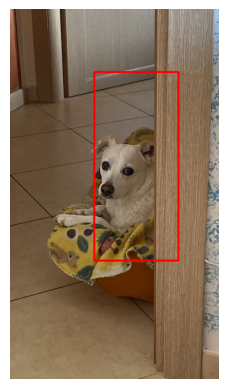

In [24]:
# Draw a rectangle on the image using OpenCV

img = read_img("sources/sophie (6).jpg")
rect = img.copy()
cv2.rectangle(rect, (200, 600), (400, 150), (255, 0, 0), 3)
show_img(rect)


camera

In [12]:
capture = cv2.VideoCapture(0)
# display the video
while capture.isOpened():
    ret, frame = capture.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    cv2.imshow("Video Window", frame)
    # enable keyboard shortcut to stop capturing - press "q" to stop
    if cv2.waitKey(1) == ord('q'):
        break
    capture.release()
    cv2.destroyAllWindows()

Secret image

k=3
original mask (256 - 2^k) = 248
secret mask (2^k - 1) = 7
8-k = 5 bits shift to the right for embeding, and to the left for secret recovery
5, bits shift to the rigth: 128 becomes  4


(-0.5, 496.5, 882.5, -0.5)

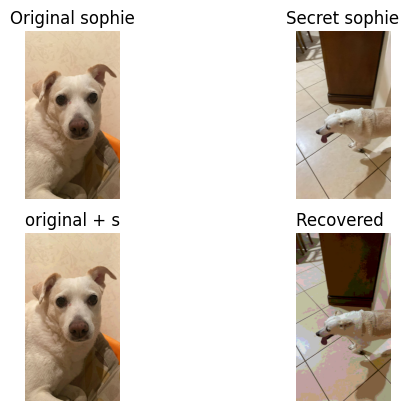

In [13]:
def embed(cover, secret, k):
    mask = 256 - 2**k
    stego = (cover & mask) | (secret >> (8 - k))
    # cv2.imwrite('stego.png', stego)
    return stego

def extract(stego, k):
    mask = 2**k - 1
    output = (stego & mask) << (8 - k)
    # cv2.imwrite('extracted.png', output)
    return output


sophie1 = read_img("sources/sophie (1).jpg")
sophie2 = read_img("sources/sophie (2).jpg")

# input param
k = 3

print (f"k={k}\noriginal mask (256 - 2^k) =", 256 - 2**k)
print ("secret mask (2^k - 1) =", 2**k - 1)
print ("8-k =", 8-k, "bits shift to the right for embeding, and to the left for secret recovery")
print (f"{8-k}, bits shift to the rigth: 128 becomes ", 128 >> (8 - k))

img_stego = embed(sophie1, sophie2, k)

img_recover = extract(img_stego, k)

plt.subplot(2,2,1)
plt.imshow(sophie1)
plt.title("Original sophie")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(sophie2)
plt.title("Secret sophie")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(img_stego)
plt.title("original + s")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(img_recover)
plt.title("Recovered ")
plt.axis('off')


